In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing blanks with 0 in TotalCharges column as tenure is 0

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df["customerID"].duplicated().sum()

0

In [15]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#Converted 0 and 1 values of SeniorCitizen to yes and no to make it easier to understand

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Getting the values of the churned customers

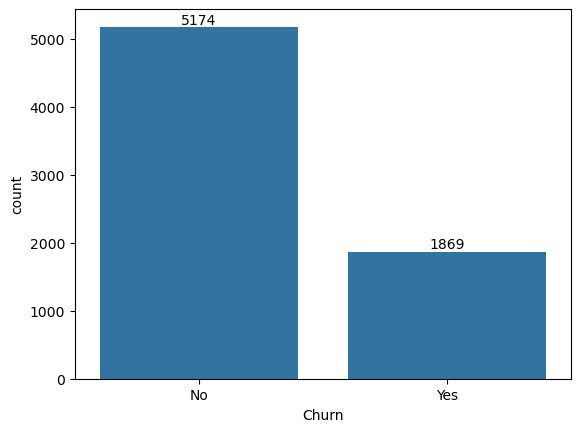

In [19]:
ax = sns.countplot(x='Churn', data = df)
ax.bar_label(ax.containers[0])
plt.show()

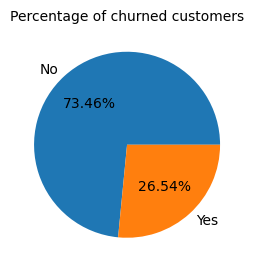

In [20]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':'count'})
gb
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of churned customers", fontsize = 10)
plt.show()

#From the pie chart above we can conclude that 26.54% of our customers have churned out

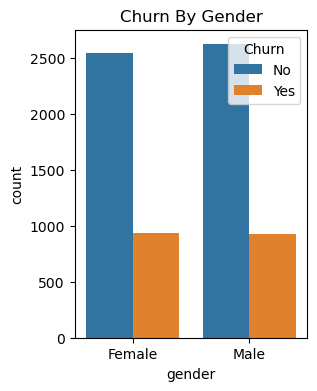

In [22]:
plt.figure(figsize = (3,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn By Gender")
plt.show()

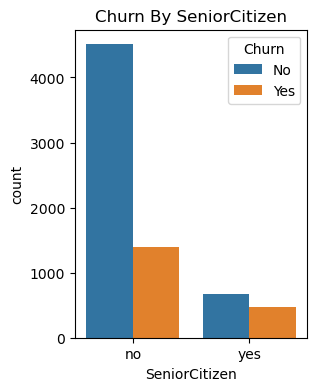

In [23]:
plt.figure(figsize = (3,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn By SeniorCitizen")
plt.show()

<Figure size 400x400 with 0 Axes>

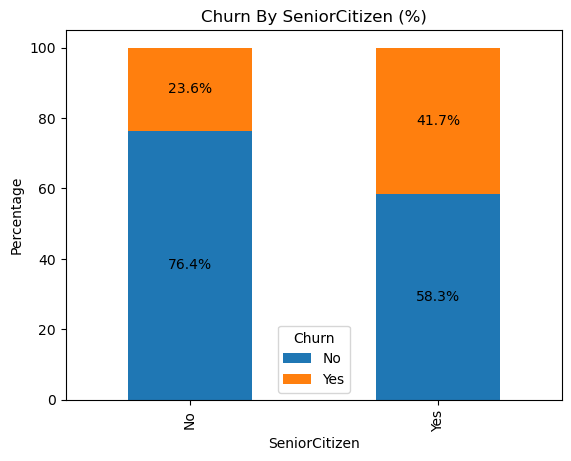

In [61]:
plt.figure(figsize = (4,4))

# Calculate percentages
senior_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_percentages = senior_counts.div(senior_counts.sum(axis=1), axis=0) * 100

# Create stacked bar chart
senior_percentages.plot(kind='bar', stacked=True)

# Add percentage labels
for i, (name, row) in enumerate(senior_percentages.iterrows()):
    cumulative_sum = 0
    for j, value in enumerate(row):
        if value > 0:  # Only add label if the segment exists
            plt.text(i, cumulative_sum + value/2, f"{value:.1f}%", 
                    ha='center', va='center')
            cumulative_sum += value

plt.title("Churn By SeniorCitizen (%)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

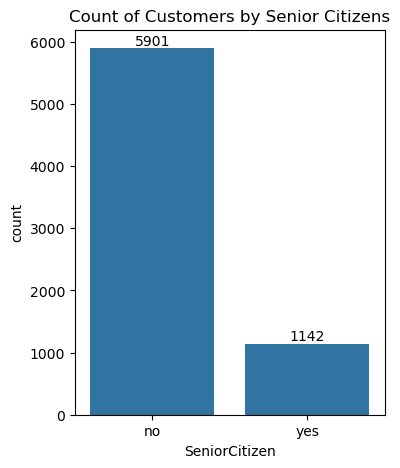

In [56]:
 plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizens")
plt.show()

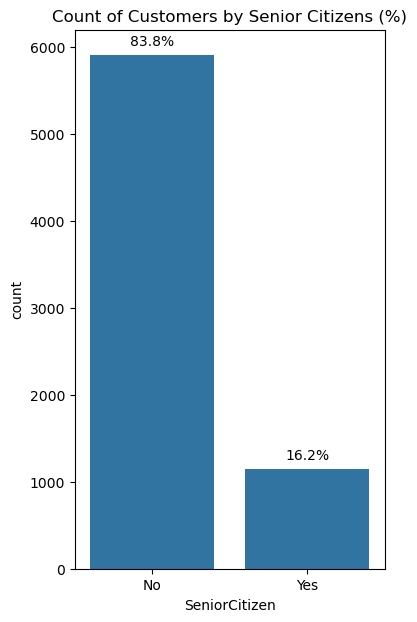

In [54]:
plt.figure(figsize = (4,7))

# Create the countplot
ax = sns.countplot(x = "SeniorCitizen", data = df)

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', 
                va = 'bottom',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.title("Count of Customers by Senior Citizens (%)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

#Comparitively as we can see from amongst the senior citizens we have the maximum churn from the senior citizen class

# Churn rate based on Tenure

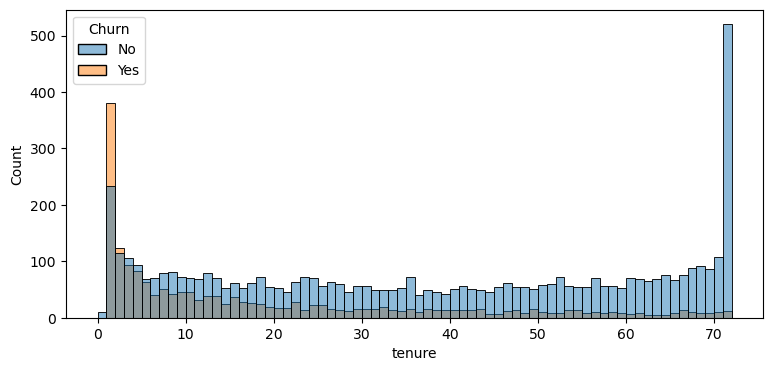

In [70]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

plt.figure(figsize = (9,4))
sns.boxplot(x = 'Churn', y = 'tenure', data = df)
plt.show()

#In conclusion people who have used our services have stayed and people in the initial periods who haven't been with us for long have churned out

# Count of Custoemrs Churn by Contract Period

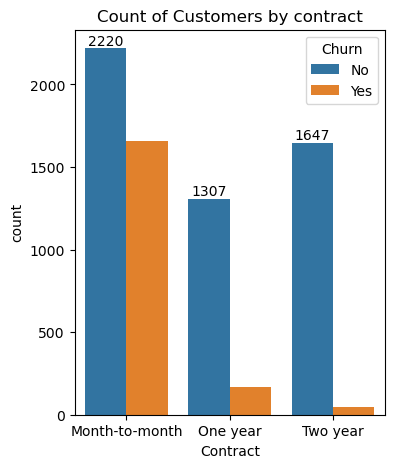

In [91]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by contract")
plt.show()

#People who have month to month contract are likely to churn compared to one year and two year contract customers.

# Churn rate of customers base on different services

In [95]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

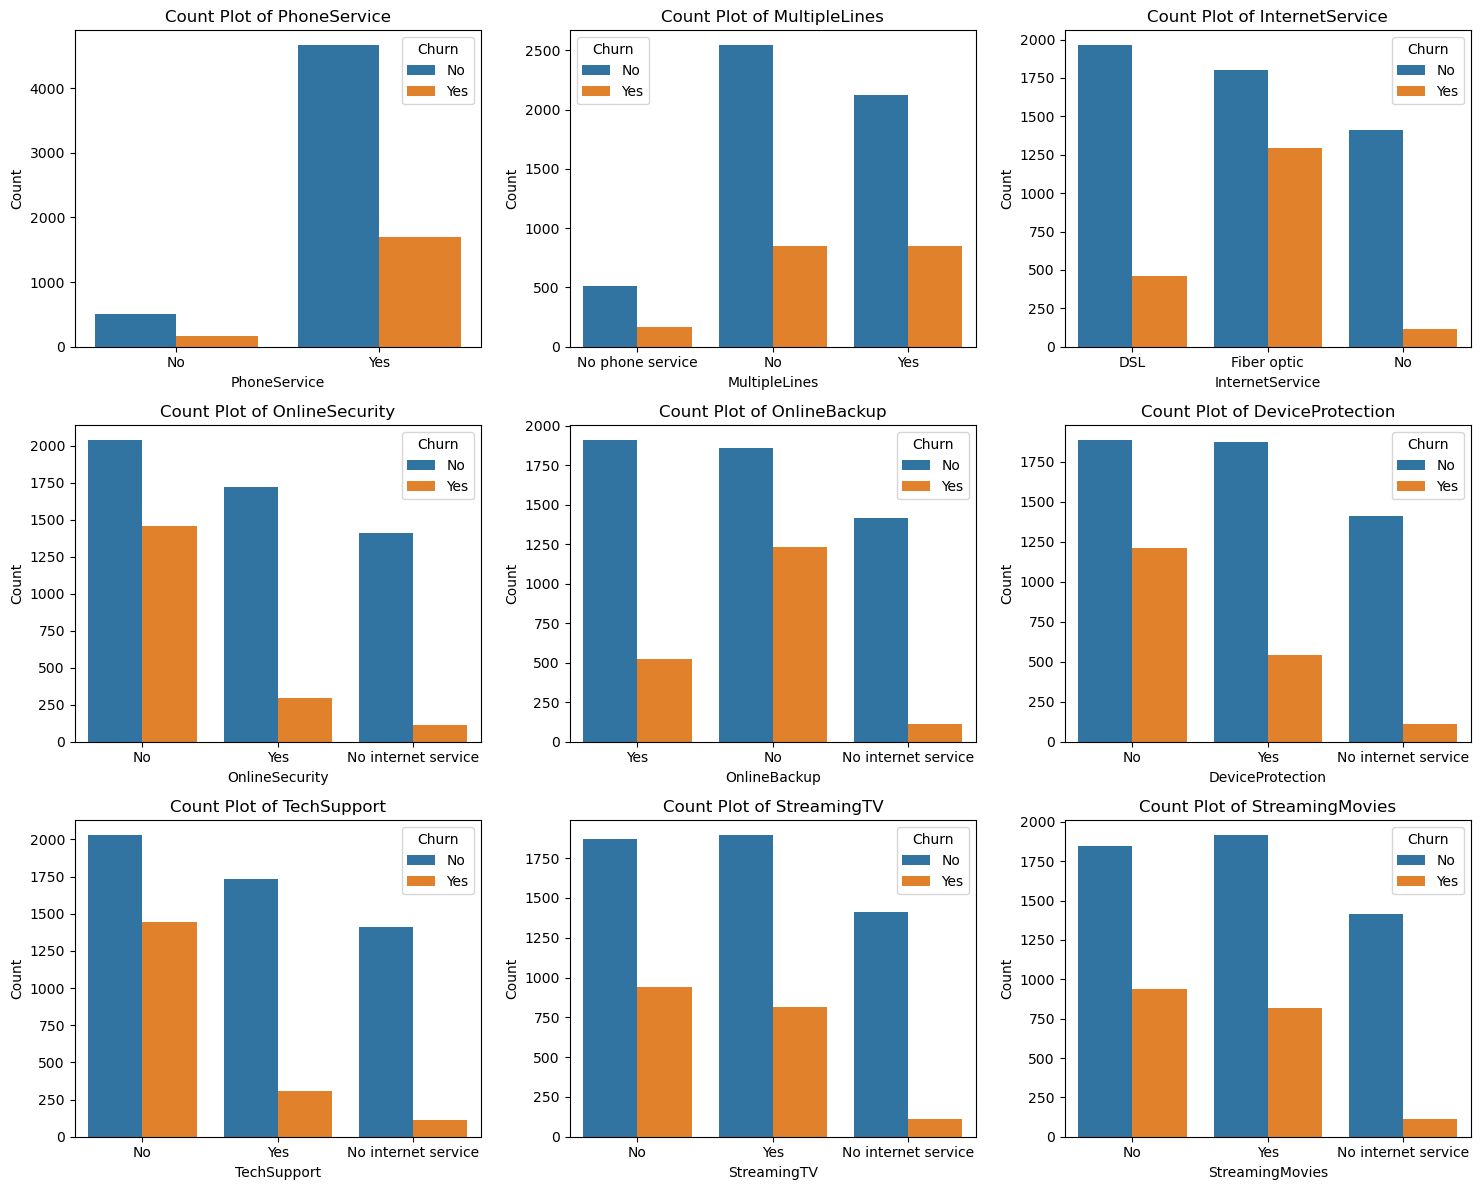

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_countplot_subplots(df, column_names):
    # Calculate the number of rows and columns for the subplot grid
    num_cols = min(3, len(column_names))  # Ensure no more than 3 columns
    num_rows = (len(column_names) + num_cols - 1) // num_cols  # Ceiling division
    
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    
    # Flatten the axes array if there's only one row or column
    if num_rows == 1:
        axes = [axes]
    elif num_cols == 1:
        axes = [axes]
    
    # Generate count plots for each column
    for i, column in enumerate(column_names):
        # Determine the subplot position
        row = i // num_cols
        col = i % num_cols
        
        # Create a count plot for the current column
        sns.countplot(data=df, x=column, ax=axes[row][col], hue = "Churn")
        axes[row][col].set_title(f'Count Plot of {column}')
        axes[row][col].set_xlabel(column)
        axes[row][col].set_ylabel('Count')
    
    # Remove any empty subplots if the number of columns is less than 3
    if num_cols < 3:
        for i in range(num_cols, 3):
            fig.delaxes(axes[row][i])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Define the list of column names
column_names = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Call the function with your DataFrame
create_countplot_subplots(df, column_names)

#The visual analysis shows a higher churn rate among customers who lack services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport. Notably, churn is also more common among users with Fiber optic InternetService. Customers without PhoneService or InternetService tend to have lower churn, likely due to limited engagement. Overall, additional services appear to contribute to customer retention.

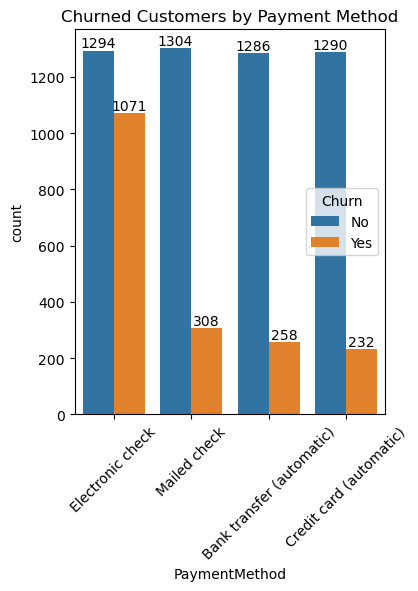

In [111]:
 plt.figure(figsize = (4,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned Customers by Payment Method")
plt.show()

#Customer is likely to churn if the customer is using the Electronic Check or Mailed Check